In [1]:
import matplotlib.pyplot as plt #import the matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd

In [228]:
data = pd.read_csv('data/PizzaResto.csv', sep = ",")

In [207]:
data

,Rating,CostPerSlice,EmployeeNumber,HeatSource,BrickOven,Neighborhood
0,0.03,1.75,2,Gas,False,LittleItaly
1,4.89,2.75,4,Coal,True,SoHo
2,4.73,4.00,5,Wood,True,LittleItaly
3,0.13,1.75,3,Gas,False,LittleItaly
4,2.45,2.25,3,Wood,True,Chinatown
...,...,...,...,...,...,...
195,0.88,2.25,3,Wood,True,Chinatown
196,4.27,1.75,2,Gas,False,EVillage
197,3.56,1.25,3,Coal,True,LES
198,0.67,3.00,3,Gas,False,LittleItaly


1

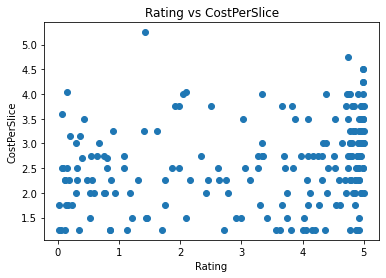

In [54]:
plt.scatter(data['Rating'], data['CostPerSlice']) 
plt.title("Rating vs CostPerSlice")
plt.xlabel("Rating")
plt.ylabel("CostPerSlice")
plt.show()

In [11]:
# It is sparse data, so 'CostPerSlice' is not affect to 'Rating'

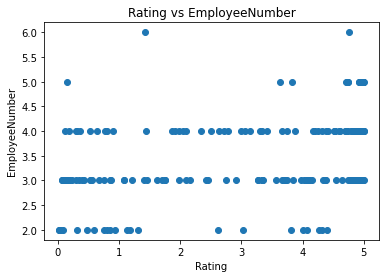

In [55]:
plt.scatter(data['Rating'], data['EmployeeNumber']) 
plt.title("Rating vs EmployeeNumber")
plt.xlabel("Rating")
plt.ylabel("EmployeeNumber")
plt.show()

In [15]:
# It is sparse too, so 'EmployeeNumber' is not affect to Raing

2

In [56]:
a = data['Rating'].mean()
a

3.2222999999999997

In [21]:
# average of 'Rating' is 3.2, so it is no equals to 2.5

In [57]:
b = data['CostPerSlice'].mean()
b

2.5845

In [23]:
# average of 'CostPerSlice' is 2.5, so it is equals to 2.5

3

In [58]:
data.groupby(['Neighborhood']).aggregate('mean')

,Rating,CostPerSlice,EmployeeNumber,BrickOven
Neighborhood,,,,
Chinatown,0.841429,2.796429,3.500000,0.714286
EVillage,4.709792,2.614583,3.750000,0.270833
LES,2.840857,2.492857,3.314286,0.342857
LittleItaly,1.212558,2.465116,3.162791,0.348837
SoHo,4.250667,2.650000,3.550000,0.300000


In [34]:
# Evillage is high 'Rating' in Neighborhood

In [59]:
data.groupby(['Neighborhood']).aggregate('max')

,Rating,CostPerSlice,EmployeeNumber,HeatSource,BrickOven
Neighborhood,,,,,
Chinatown,2.45,4.05,5,Wood,True
EVillage,5.00,4.50,5,Wood,True
LES,4.99,4.50,5,Wood,True
LittleItaly,4.78,5.25,6,Wood,True
SoHo,5.00,4.75,6,Wood,True


In [36]:
# SoHo is high 'Rating' in Neighborhood

In [60]:
data.groupby(['Neighborhood']).aggregate('median')

,Rating,CostPerSlice,EmployeeNumber,BrickOven
Neighborhood,,,,
Chinatown,0.385,2.475,3,True
EVillage,4.920,2.500,4,False
LES,3.030,2.500,3,False
LittleItaly,0.650,2.500,3,False
SoHo,4.625,2.750,4,False


In [38]:
# EVillage is high Rating in Neighborhood

In [61]:
data.groupby(['BrickOven']).aggregate('mean')

,Rating,CostPerSlice,EmployeeNumber
BrickOven,,,
False,3.142652,2.549242,3.409091
True,3.376912,2.652941,3.588235


In [46]:
# In mean values, If use BrickOven, 'Rating' is decreased

In [62]:
data.groupby(['BrickOven']).aggregate('max')

,Rating,CostPerSlice,EmployeeNumber,HeatSource,Neighborhood
BrickOven,,,,,
False,5.0,4.75,6,Gas,SoHo
True,5.0,5.25,6,Wood,SoHo


In [49]:
# In max values, if use BrickOven, 'Rating' is same.

In [63]:
data.groupby(['BrickOven']).aggregate('median')

,Rating,CostPerSlice,EmployeeNumber
BrickOven,,,
False,3.930,2.5,3.0
True,4.345,2.6,3.5


In [ ]:
# In median values, if use BrickOven, 'Rating' is increased 

4

In [170]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [171]:
feature_cols = ['CostPerSlice', 'EmployeeNumber']
X = data[feature_cols]
y = data.Rating

# instantiate, fit
lm = smf.ols(formula ='Rating ~ CostPerSlice+EmployeeNumber', data=data).fit()
lm.rsquared

0.13731990654101267

In [172]:
# rsquared is 0.812

In [173]:
area_dummies = pd.get_dummies(data.Neighborhood, prefix='Area').iloc[:, 1:] # prefix : 앞부분(단어의) # iloc[:, 1:] : 모든 index, 1열의 모든 행을 get dummies로 만들어라
# data.Area : 이 한 열만 가져오는 것

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1) # concat : 데이터 프레임 결합
data.head()

,Rating,CostPerSlice,EmployeeNumber,HeatSource,BrickOven,Neighborhood,Area_EVillage,Area_LES,Area_LittleItaly,Area_SoHo
0,0.03,1.75,2,Gas,False,LittleItaly,0,0,1,0
1,4.89,2.75,4,Coal,True,SoHo,0,0,0,1
2,4.73,4.00,5,Wood,True,LittleItaly,0,0,1,0
3,0.13,1.75,3,Gas,False,LittleItaly,0,0,1,0
4,2.45,2.25,3,Wood,True,Chinatown,0,0,0,0


In [174]:
feature_cols = ['CostPerSlice', 'EmployeeNumber']
X = data[feature_cols]
y = data.Rating

# instantiate, fit
lm = smf.ols(formula='Rating ~ CostPerSlice + EmployeeNumber + Area_EVillage + Area_LES + Area_LittleItaly+ Area_SoHo', data=data).fit()
lm.rsquared

0.7275100869736973

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [176]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [177]:
preds = treereg.predict(X_test)

In [178]:
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

1.6941818901544892

In [179]:
from sklearn.model_selection import cross_val_score

In [180]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') #RMSE #cv(cross validatopm):3 # 평균 제곱 오차 : 오차의 제곱에 대한 평균
np.mean(np.sqrt(-scores)) 

1.7756700816622273

In [181]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') #RMSE #cv(cross validatopm):3 # 평균 제곱 오차 : 오차의 제곱에 대한 평균
np.mean(np.sqrt(-scores)) 

1.7715401134132212

In [183]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') #RMSE #cv(cross validatopm):3 # 평균 제곱 오차 : 오차의 제곱에 대한 평균
np.mean(np.sqrt(-scores)) 

1.8511408363777964

In [185]:
# best rquared is if max_depth is 3, which is 1.7715

5

In [231]:
data['rate'] = np.where(data['Rating']<=3,
'low', 'high')

In [232]:
data

,Rating,CostPerSlice,EmployeeNumber,HeatSource,BrickOven,Neighborhood,rate
0,0.03,1.75,2,Gas,False,LittleItaly,low
1,4.89,2.75,4,Coal,True,SoHo,high
2,4.73,4.00,5,Wood,True,LittleItaly,high
3,0.13,1.75,3,Gas,False,LittleItaly,low
4,2.45,2.25,3,Wood,True,Chinatown,low
...,...,...,...,...,...,...,...
195,0.88,2.25,3,Wood,True,Chinatown,low
196,4.27,1.75,2,Gas,False,EVillage,high
197,3.56,1.25,3,Coal,True,LES,high
198,0.67,3.00,3,Gas,False,LittleItaly,low


In [233]:
data.isnull().sum()

Rating            0
CostPerSlice      0
EmployeeNumber    0
HeatSource        0
BrickOven         0
Neighborhood      0
rate              0
dtype: int64

In [234]:
pd.get_dummies(data.rate, prefix='RATE').head(10)

,RATE_high,RATE_low
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,0,1


In [235]:
rate_dummies = pd.get_dummies(data.rate, prefix='RATE').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
data = pd.concat([data, rate_dummies], axis=1)

In [236]:
data

,Rating,CostPerSlice,EmployeeNumber,HeatSource,BrickOven,Neighborhood,rate,RATE_low
0,0.03,1.75,2,Gas,False,LittleItaly,low,1
1,4.89,2.75,4,Coal,True,SoHo,high,0
2,4.73,4.00,5,Wood,True,LittleItaly,high,0
3,0.13,1.75,3,Gas,False,LittleItaly,low,1
4,2.45,2.25,3,Wood,True,Chinatown,low,1
...,...,...,...,...,...,...,...,...
195,0.88,2.25,3,Wood,True,Chinatown,low,1
196,4.27,1.75,2,Gas,False,EVillage,high,0
197,3.56,1.25,3,Coal,True,LES,high,0
198,0.67,3.00,3,Gas,False,LittleItaly,low,1


In [237]:
feature_cols = ['CostPerSlice', 'EmployeeNumber']

# define X and y
X = data[feature_cols]
y = data.RATE_low

In [238]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [239]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,CostPerSlice,0.578171
1,EmployeeNumber,0.421829


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [241]:
treeclf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeclf2 = treeclf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = treeclf2.predict(X_test)

In [242]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [243]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on test set: 0.60


6

In [ ]:
features = ['Rating','EmployeeNumber','CostPerSlice']

# Separating out the features
x = df.loc[:, features].values # array # feature에 있는 값 반환 # df : 여기에 내 데이터 넣어주기
# Separating out the target
y = df.loc[:,['target']].values

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans #library for K-Means Clustering
from sklearn import datasets

In [249]:
d = data[['Rating','EmployeeNumber','CostPerSlice']].values

In [251]:
est = KMeans(n_clusters=3, init='k-means++')#generate a k-means model. you can change from 'random' to 'k-means++' for (sometimes) a better result
# est는 클러스터 3개짜리의 데이터 분석하는 것
est.fit(d) #fit into the data d -> est에 data d를 넣음
y_kmeans = est.predict(d) #

In [252]:
est.fit_predict(d) # 클러스터를 만들고 소속 정보를 얻기 위해 fit_predict 메서드를 사용
inertia = est.inertia_ # 클러스터의 수가 증가할수록, inertia는 감소-> inertia : error
inertia

276.8733186810876

AttributeError: 'DataFrame' object has no attribute 'data'

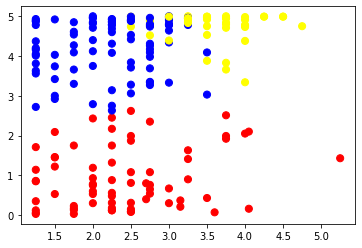

In [256]:
colors = np.array(['red','blue','yellow']) #red:group 1, blue:group 2, yellow:group 0
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50) #column2: sepal length(x축), column0:petal length(y축) -> 종류는 3개
plt.xlabel(data.d[2]) # petal length
plt.ylabel(data.d[0])